# Late Fusion
## Modality 3: Health information

## Setup

In [2]:
import os
from glob import glob
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import pickle
import copy

### Paths

In [3]:
input_path = '../../../2_data_preprocessing/output/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../../config/'

### Load global variables

In [4]:
exec(open(os.path.join(glob_conf_path, 'global_config_paper.py')).read())
exec(open(os.path.join(glob_conf_path, 'config_feature_contributions.py')).read())

## Model interpretation

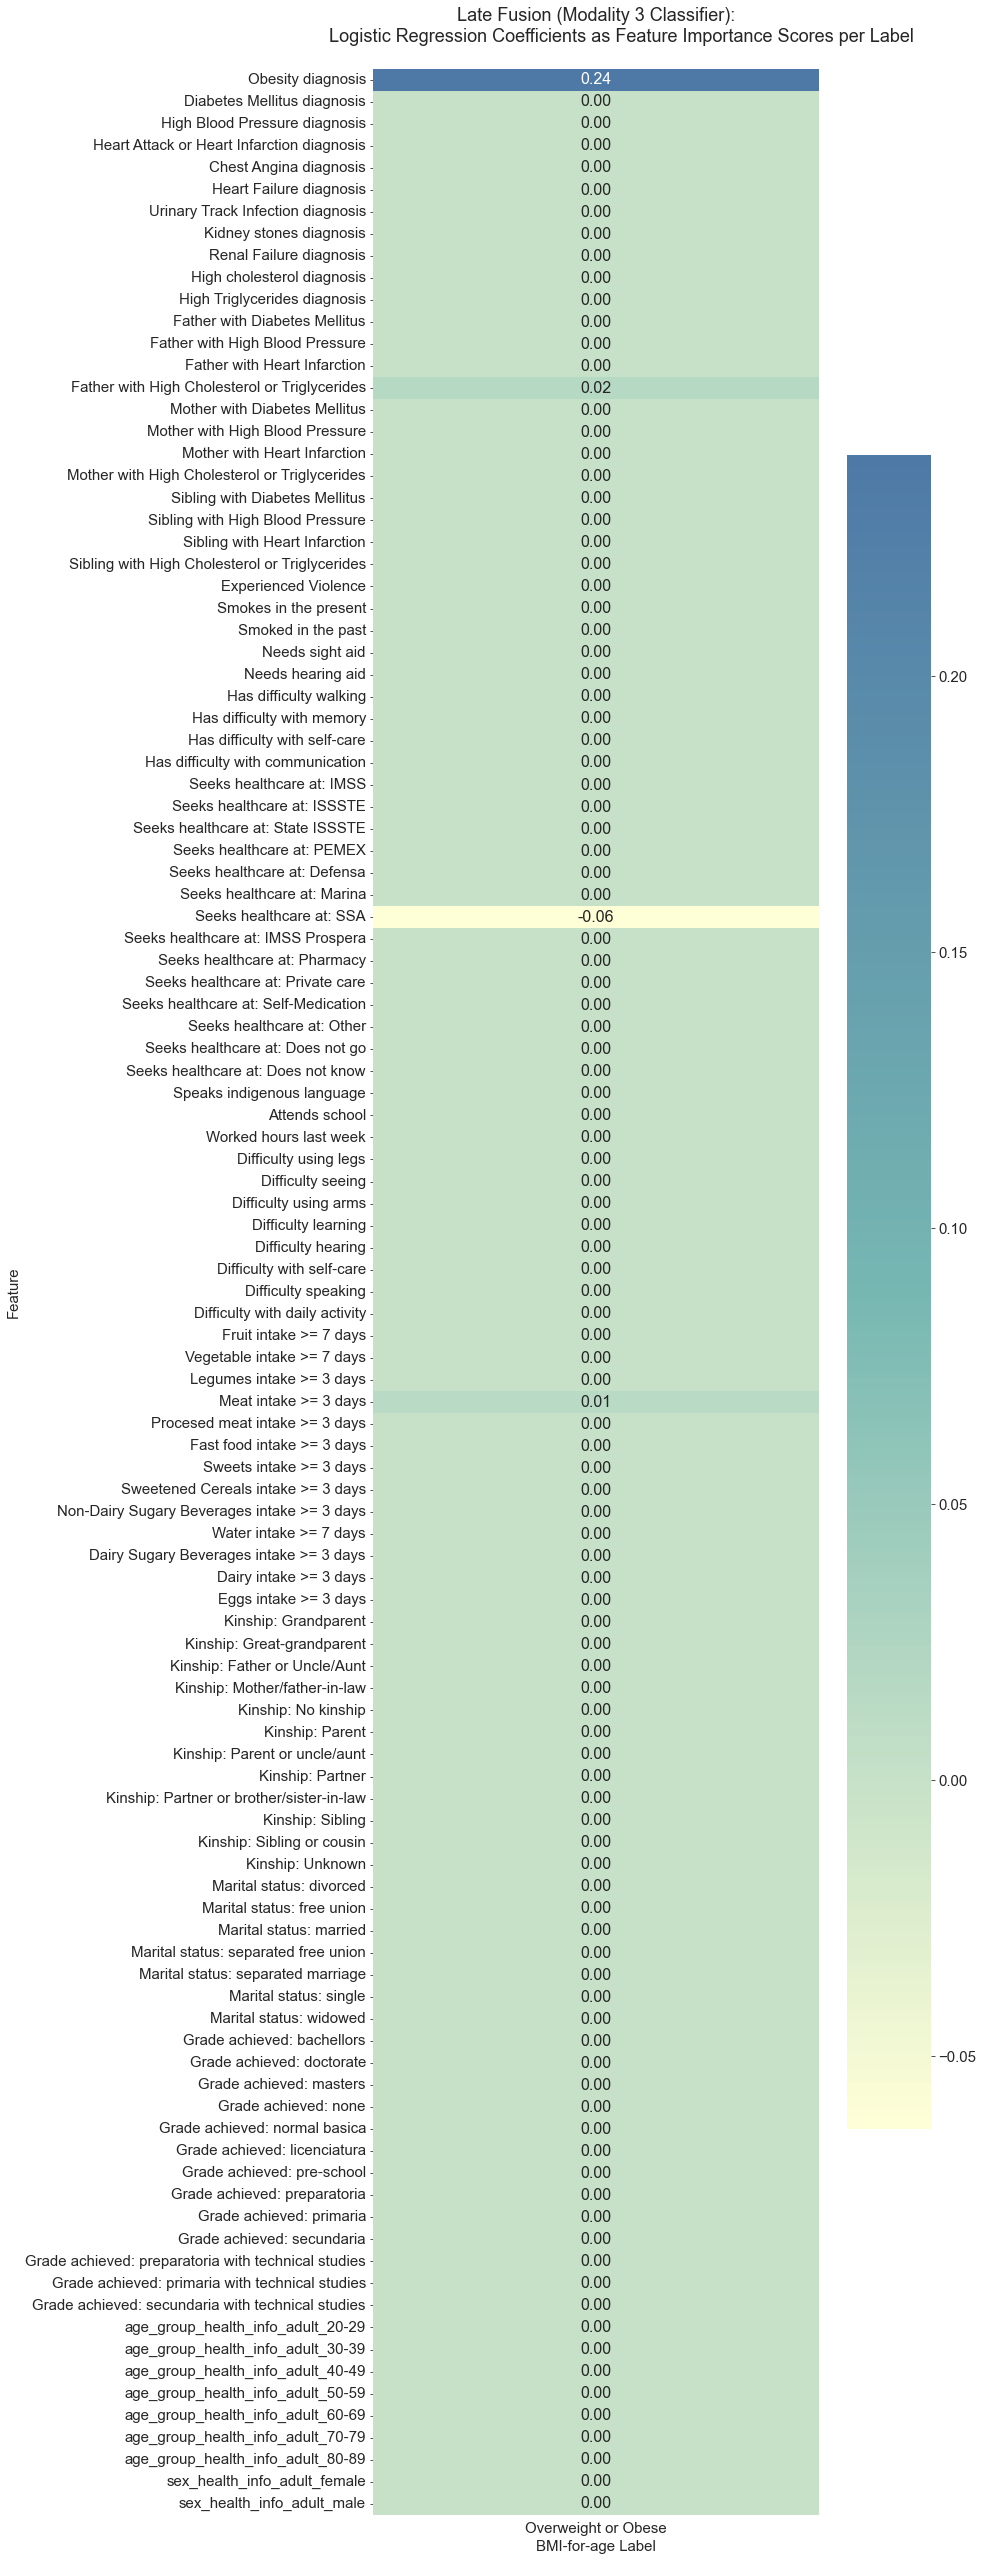

In [5]:
# Load data
train_m3_df = pd.read_csv(os.path.join(input_path, 'train_m3_encoded_df.csv'))
feat = list(train_m3_df.drop(columns=['label','group']).columns)


# Load the model from disk
file_path = os.path.join(output_path,'models','mod_elastic_net_m3.sav')
clf = pickle.load(open(file_path, 'rb'))
coef_df = pd.DataFrame(clf.coef_, index=list(label_id_to_label_num_coef_int.keys()), columns=feat).T
#coef_df = coef_df.reindex(sorted(coef_df.columns), axis=1)
coef_df = coef_df.rename(var_name_to_feat_m3, axis=0)
#coef_df = coef_df.reindex(list(var_name_to_feat_m3.values())).dropna()
coef_df.to_csv(os.path.join(output_path,'others','tmp','m3_classifier_feature_contributions.csv'), index=True, header=True)


# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(10,45))
sns.heatmap(coef_df, annot=True, annot_kws={"size": 16}, fmt='.2f', cmap=conf_cmap)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
plt.savefig(os.path.join(output_path,'others','report_m3_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 3 Classifier):
          Logistic Regression Coefficients as Feature Importance Scores per Label
          """)
plt.savefig(os.path.join(output_path,'others','m3_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})

In [6]:
coef_df_ordered = coef_df.sort_values(by="Overweight or Obese", axis=0, ascending=False)
coef_df_ordered.head(10)

,Overweight or Obese
Obesity diagnosis,0.240125
Father with High Cholesterol or Triglycerides,0.017897
Meat intake >= 3 days,0.014757
Vegetable intake >= 7 days,0.000000
Kinship: Great-grandparent,0.000000
Kinship: Unknown,0.000000
Kinship: Sibling or cousin,0.000000
Kinship: Sibling,0.000000
Kinship: Partner or brother/sister-in-law,0.000000
Kinship: Partner,0.000000


In [7]:
coef_df_ordered.tail(10)

,Overweight or Obese
Seeks healthcare at: IMSS Prospera,0.000000
Seeks healthcare at: Marina,0.000000
Seeks healthcare at: Defensa,0.000000
Seeks healthcare at: PEMEX,0.000000
Seeks healthcare at: State ISSSTE,0.000000
Seeks healthcare at: ISSSTE,0.000000
Seeks healthcare at: IMSS,0.000000
Has difficulty with communication,0.000000
sex_health_info_adult_male,0.000000
Seeks healthcare at: SSA,-0.063095


In [ ]:
clf.coef_

In [ ]:
data = coef_df.copy()
data_abs = data.abs()
top_features_per_BMI_for_age_label = {}
n = 5
for c in data.columns:
    top_features_per_BMI_for_age_label[c] = data_abs.nlargest(n, columns=c).index.tolist()

#all_features = set(data.index.tolist())
features_to_keep = set([item for sublist in top_features_per_BMI_for_age_label.values() for item in sublist])
#features_to_drop = all_features - features_to_keep

data_reduced = data.loc[features_to_keep].reindex(data.index).dropna()
data_reduced = data_reduced.reindex(feat_order_summary_m3)
mask = np.array([[feat not in top_features_per_BMI_for_age_label[c] for feat in data_reduced.index] for c in data_reduced.columns]).T
data_reduced.mask(mask).to_csv(os.path.join(output_path,'others','tmp','m3_classifier_feature_contributions_top_'+str(n)+'.csv'), index=True, header=True)

# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(18,22))
hm = sns.heatmap(data_reduced, annot=True, annot_kws={"size": 13}, fmt='.2f', cmap=conf_cmap, cbar_kws={"aspect": 45}, linewidth=0.25, mask=mask)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
ax = hm.axes
ax.set_facecolor((238/255, 238/255, 238/255))
plt.savefig(os.path.join(output_path,'others','report_m3_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 2 Classifier): 
          Top """ + str(n) + """ Most Important Features per BMI-for-age Label
          """)
plt.savefig(os.path.join(output_path,'others','m3_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})